<a href="https://colab.research.google.com/github/Aech-7/Machine-learning-test/blob/main/ML_prequisite_text_23110154.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Question1:**  
**How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

Assume matrix is A of size (n,k) and a matrix B of size (k,m). If we perform a matrix multiplication we get a matrix, lets call it C with size (m,n).
To find the element at position (1,1) in matrix **C**, we will need to multiply each element in first row of matrix A with its corresponding element in first column of matrix B and then add. This steps results in k multiplications, since matrix A has k elements in each row and (k-1) additions. This gave us just one element of Matrix **C**. <br>
**Step 1:** **k** multiplications and **(k-1)** additions. <br>
To find all the elements in $1{st}$ column of Matrix **C**, we will need to perform the first step n times since Matrix C has n rows.<br>
**Step 2:** **nk** multiplications and **n(k-1)** additions.<br>
And we have m such columns, so we need to repeat the step 2, **m** times, that gives us **mnk** muliplications and **mn(k-1)** additions.<br>
### **Final Answer:** **$m \times n \times k$** Multiplications and **$ m \times n \times (k-1)$** Additions
----

## **Question 2:**
**Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

Let's make 2 matrices with size (3,4) and (4,2):

In [ ]:
A = [[i for i in range(4)] for j in range(3)]
print('Matrix A=',A)

Matrix A= [[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]]


In [ ]:
B = [[2,4],[3,9],[10,5],[7,6]]
print('Matrix B=',B)

Matrix B= [[2, 4], [3, 9], [10, 5], [7, 6]]


In [ ]:
import time
start_time = time.time()
C = [[0 for _ in range(2)] for _ in range(3)]

for i in range(3):
    for j in range(2):
        for l in range(4):
            C[i][j] += A[i][l]*B[l][j]
print(C)
end_time = time.time()
print("Result using pure Python:")
python_time = end_time - start_time
print(f"Pure Python time: {python_time:.6f} seconds\n")

[[44, 37], [44, 37], [44, 37]]
Result using pure Python:
Pure Python time: 0.002000 seconds



In [ ]:
import numpy as np
start_time = time.time()
A_np = np.array(A)
B_np = np.array(B)

C_np = np.dot(A_np,B_np)
print(C)
end_time = time.time()
print("Result using NumPy:")
numpy_time = end_time - start_time
print(f"NumPy time: {numpy_time:.6f} seconds\n")

[[44, 37], [44, 37], [44, 37]]
Result using NumPy:
NumPy time: 0.001000 seconds



# **Question 3:**
**Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

Let's assume we have a array with n elemnets. To find the highest element we need to make one pass through the list which is **O(n)** operation. To find the second highest, we again need to pass the array that is again O(n) operation. To find the median, we will need to do n/2 passes of the array, so O(n) operations are to be repeated n/2 times, that gives us time complexity of **O($n^{2}$)**.

In [ ]:
A = [2, 10, 14, 65, 11,34, 76,2,98,102,64]


# **Question 4:**
What is the gradient of the following function with respect to x and y?
$$x^2 y + y^3 \sin(x)$$



The gradient of a function is a vector consisting of all its partial derivatives with respect to each variable.
The gradient is:
$$
\nabla f = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n} \right)
$$
<br>
Our function has two variables x and y.
$$
f(x, y) = x^2 y + y^3 \sin(x)
$$
$$
\frac{\partial f}{\partial x} = 2 x y + y^3 \cos(x)
$$
$$
\frac{\partial f}{\partial y} = x^2 + 3 y^2 \sin(x)
$$
The gradient is:
$$
\nabla f(x, y) =
\begin{pmatrix}
2 x y + y^3 \cos(x) \\
x^2 + 3 y^2 \sin(x)
\end{pmatrix}
$$

# **Question 5:**
Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [2]:
import jax
import jax.numpy as jnp
import numpy as np

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

gred = jax.grad(f, argnums=(0, 1))

# New set of test points
x_test = [0.0, np.pi/2]
y_test = [1.0, -2.5, 0.3]

for x in x_test:
    for y in y_test:
        jax_grad = gred(x, y)  # (df/dx, df/dy) from JAX

        df_dx = 2 * x * y + y ** 3 * np.cos(x)
        df_dy = x ** 2 + 3 * y ** 2 * np.sin(x)
        analytical = (df_dx, df_dy)

        print(f"x={x:7.4f}, y={y:7.4f}")
        print("analytical: ", analytical)
        print("Using jax: ", tuple([float(v) for v in jax_grad]))
        print("---")




x= 0.0000, y= 1.0000
analytical:  (np.float64(1.0), np.float64(0.0))
Using jax:  (1.0, 0.0)
---
x= 0.0000, y=-2.5000
analytical:  (np.float64(-15.625), np.float64(0.0))
Using jax:  (-15.625, 0.0)
---
x= 0.0000, y= 0.3000
analytical:  (np.float64(0.026999999999999996), np.float64(0.0))
Using jax:  (0.027000002562999725, 0.0)
---
x= 1.5708, y= 1.0000
analytical:  (np.float64(3.141592653589793), np.float64(5.4674011002723395))
Using jax:  (3.1415927410125732, 5.467401504516602)
---
x= 1.5708, y=-2.5000
analytical:  (np.float64(-7.853981633974484), np.float64(21.21740110027234))
Using jax:  (-7.8539814949035645, 21.2174015045166)
---
x= 1.5708, y= 0.3000
analytical:  (np.float64(0.9424777960769379), np.float64(2.7374011002723395))
Using jax:  (0.9424778819084167, 2.737401247024536)
---


# **Question 6:**
Use sympy to confirm that you obtain the same gradient analytically.

In [3]:
import sympy as sp
x, y = sp.symbols('x y', real=True)
f = x**2 * y + y**3 * sp.sin(x)
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)
gradient = sp.Matrix([df_dx, df_dy])

print("Function f(x,y):", f)
print("∂f/∂x =", df_dx)
print("∂f/∂y =", df_dy)
print("Gradient vector =", gradient)

Function f(x,y): x**2*y + y**3*sin(x)
∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)
Gradient vector = Matrix([[2*x*y + y**3*cos(x)], [x**2 + 3*y**2*sin(x)]])


# **Question 7:**
Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

In [8]:
year = [2022,2023,2024,2025]
branch = ['ME','CS']
subject = ['Maths','science']
store = {}
stop_entry = False
for y in year:
  if stop_entry:
    break
  store[y]={}
  for b in branch:
    store[y][b]={}
    roll_input = input(f"Enter Roll no. for {b} in {y} (or -1 to skip): ")
    if roll_input == '-1':
          stop_entry = True
          break
    store[y][b]['roll no.'] = int(roll_input)
    store[y][b]['Name'] = input('Name:')
    store[y][b]['Marks'] = {}
    for s in subject:
      mark = int(input(f"Enter marks for {s}:"))
      store[y][b]['Marks'][s]= mark
print(store)


Enter Roll no. for ME in 2022 (or -1 to skip): 1
Name:h
Enter marks for Maths:10
Enter marks for science:5
Enter Roll no. for CS in 2022 (or -1 to skip): 10
Name:m
Enter marks for Maths:1
Enter marks for science:2
Enter Roll no. for ME in 2023 (or -1 to skip): 1
Name:a
Enter marks for Maths:2
Enter marks for science:5
Enter Roll no. for CS in 2023 (or -1 to skip): 3
Name:h
Enter marks for Maths:5
Enter marks for science:4
Enter Roll no. for ME in 2024 (or -1 to skip): 7
Name:g
Enter marks for Maths:2
Enter marks for science:3
Enter Roll no. for CS in 2024 (or -1 to skip): 5
Name:b
Enter marks for Maths:2
Enter marks for science:4
Enter Roll no. for ME in 2025 (or -1 to skip): 5
Name:j
Enter marks for Maths:4
Enter marks for science:5
Enter Roll no. for CS in 2025 (or -1 to skip): 4
Name:g
Enter marks for Maths:4
Enter marks for science:1
{2022: {'ME': {'roll no.': 1, 'Name': 'h', 'Marks': {'Maths': 10, 'science': 5}}, 'CS': {'roll no.': 10, 'Name': 'm', 'Marks': {'Maths': 1, 'science':

# **Question 8:**
Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.


In [12]:
class Student:
    def __init__(self, roll_no, name, marks):
        self.roll_no = roll_no
        self.name = name
        self.marks = marks  # e.g., {'Maths': 90, 'English': 99}

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __str__(self):
        result = f"{self.year}\n"
        for branch in self.branches:
            result += f"  {branch.name}\n"
            for student in branch.students:
                result += f"    Roll Number: {student.roll_no}, Name: {student.name}\n"
                for subject, mark in student.marks.items():
                    result += f"      {subject}: {mark}\n"
        return result

data = []
stud1 = Student(110, 'Aarav', {'Maths': 85, 'English': 92})
stud2 = Student(215, 'Meera', {'Maths': 78, 'English': 88})
stud3 = Student(320, 'Kabir', {'Maths': 95, 'English': 81})
stud4 = Student(425, 'Ishita', {'Maths': 72, 'English': 90})

branch1 = Branch('Branch 1')
branch1.add_student(stud1)
year1 = Year(2022)
year1.add_branch(branch1)
data.append(year1)

branch2 = Branch('Branch 2')
branch2.add_student(stud2)
year2 = Year(2023)
year2.add_branch(branch2)
data.append(year2)

branch3 = Branch('Branch 1')
branch3.add_student(stud3)
year3 = Year(2024)
year3.add_branch(branch3)
data.append(year3)

branch4 = Branch('Branch 2')
branch4.add_student(stud4)
year4 = Year(2025)
year4.add_branch(branch4)
data.append(year4)

for year in data:
    print(year)


2022
  Branch 1
    Roll Number: 110, Name: Aarav
      Maths: 85
      English: 92

2023
  Branch 2
    Roll Number: 215, Name: Meera
      Maths: 78
      English: 88

2024
  Branch 1
    Roll Number: 320, Name: Kabir
      Maths: 95
      English: 81

2025
  Branch 2
    Roll Number: 425, Name: Ishita
      Maths: 72
      English: 90



# **Question 9:**
Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

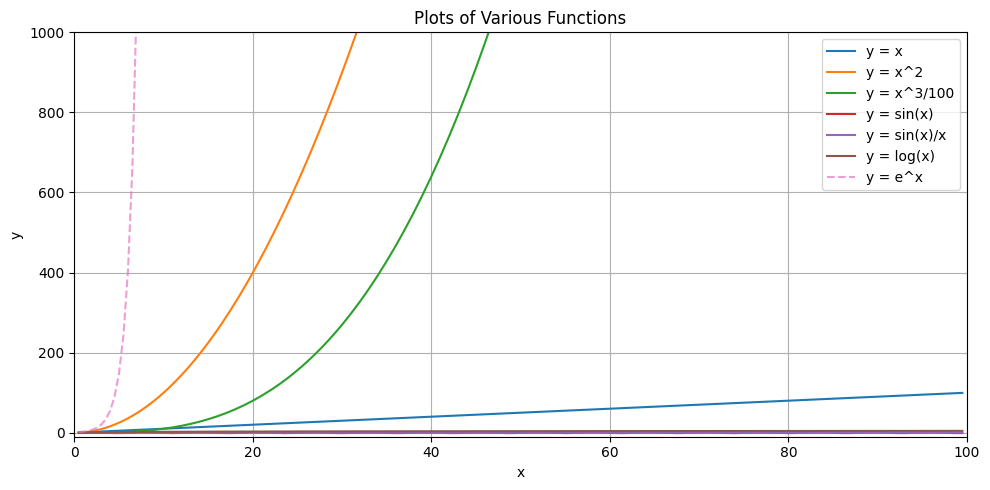

In [15]:
import matplotlib.pyplot as plt
x = np.arange(0.5, 100, 0.5)
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)
plt.figure(figsize=(10, 5))

plt.plot(x, y1, label='y = x')
plt.plot(x, y2, label='y = x^2')
plt.plot(x, y3, label='y = x^3/100')
plt.plot(x, y4, label='y = sin(x)')
plt.plot(x, y5, label='y = sin(x)/x')
plt.plot(x, y6, label='y = log(x)')
plt.plot(x, y7, label='y = e^x', linestyle='--', alpha=0.7)
plt.ylim(-10, 1000)
plt.xlim(0, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plots of Various Functions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Question 10:**
Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [20]:
import pandas as pd

matrix = 1 + np.random.rand(20, 5)
print(matrix)
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])
std_col = df.std()
col_highest_std = std_col.idxmax()
print(f"Column with highest standard deviation: {col_highest_std} (std = {std_col[col_highest_std]:.4f})")
mean_row = df.mean(axis=1)
row_lowest_mean = mean_row.idxmin()
print(f"Row with lowest mean: {row_lowest_mean} (mean = {mean_row[row_lowest_mean]:.4f})")

[[1.58450045 1.80575199 1.76616273 1.46269165 1.96702689]
 [1.9854297  1.75508674 1.3292151  1.73163982 1.36356774]
 [1.05239299 1.80173665 1.09493153 1.06851606 1.54220231]
 [1.02847483 1.38745654 1.822374   1.86844258 1.2245929 ]
 [1.94582189 1.31039501 1.66182116 1.2137199  1.192208  ]
 [1.11939127 1.80906617 1.41726207 1.44661159 1.40540281]
 [1.31899744 1.43206563 1.82068569 1.54849105 1.55684751]
 [1.3146714  1.92047446 1.14783351 1.21194169 1.0887746 ]
 [1.02828513 1.12580811 1.27356759 1.89149828 1.56177039]
 [1.40104345 1.51674379 1.08140304 1.28495895 1.57639871]
 [1.35810211 1.50500257 1.03140991 1.77449298 1.63680185]
 [1.24431443 1.04240892 1.26375329 1.7285418  1.0650282 ]
 [1.95581393 1.13649074 1.62470693 1.12833771 1.03525753]
 [1.26149941 1.714617   1.97572175 1.85969057 1.0386758 ]
 [1.6697541  1.81901983 1.46055077 1.12244632 1.27110864]
 [1.67620001 1.45018812 1.46784725 1.82179277 1.09615911]
 [1.73051451 1.42711116 1.72717227 1.71880094 1.19861409]
 [1.69557581 1

# **Question 11:**
Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [23]:
df['f']=df['a']+df['b']+df['c']+df['d']+df['e']
df['g']='LT8'
df.loc[df['f']>=8,'g']='GT8'
print(df)
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print(f"Standard deviation of 'f' where g is 'LT8': {std_lt8:.4f}")
print(f"Standard deviation of 'f' where g is 'GT8': {std_gt8:.4f}")


           a         b         c         d         e         f    g
0   1.584500  1.805752  1.766163  1.462692  1.967027  8.586134  GT8
1   1.985430  1.755087  1.329215  1.731640  1.363568  8.164939  GT8
2   1.052393  1.801737  1.094932  1.068516  1.542202  6.559780  LT8
3   1.028475  1.387457  1.822374  1.868443  1.224593  7.331341  LT8
4   1.945822  1.310395  1.661821  1.213720  1.192208  7.323966  LT8
5   1.119391  1.809066  1.417262  1.446612  1.405403  7.197734  LT8
6   1.318997  1.432066  1.820686  1.548491  1.556848  7.677087  LT8
7   1.314671  1.920474  1.147834  1.211942  1.088775  6.683696  LT8
8   1.028285  1.125808  1.273568  1.891498  1.561770  6.880930  LT8
9   1.401043  1.516744  1.081403  1.284959  1.576399  6.860548  LT8
10  1.358102  1.505003  1.031410  1.774493  1.636802  7.305809  LT8
11  1.244314  1.042409  1.263753  1.728542  1.065028  6.344047  LT8
12  1.955814  1.136491  1.624707  1.128338  1.035258  6.880607  LT8
13  1.261499  1.714617  1.975722  1.859691  1.03

# **Question 12:**
Write a small piece of code to explain broadcasting in numpy.

In [26]:
arr1=np.array([4,2,4,11])
arr2=np.array([[4],[5],[6]])
print(arr1.shape,arr2.shape)
print(arr1+arr2)

(4,) (3, 1)
[[ 8  6  8 15]
 [ 9  7  9 16]
 [10  8 10 17]]


# **Question 13:**

Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [27]:
import numpy as np

def f(a):
    a = a.flatten()
    mindex = 0
    mvalue = a[0]
    for i in range(1, a.size):
        if a[i] < mvalue:
            mindex = i
            mvalue = a[i]
    return mindex

arr = np.array([[9, 3, 6, 7],
                [1, 4, 7, 9]])

min_index = f(arr)
print(min_index)

x = np.argmin(arr)
print(x)


4
4
